<img src="http://blogs.sandiegozoo.org/wp-content/uploads/2013/08/PandaCubGrowthCurve-25Jul13.jpg" class="pull-right" width=300>
## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## February 26, 2018: Statistics (and pandas)

Administrivia:

- CAPE evaluations are available! They close Monday, March 19 at 8am. Since this course is highly experimental, your feedback will be very helpful for shaping future offerings.
- Attendance scores through Wednesday, February 21 are now posted on TritonEd. Contact Peter with any issues.
- My office hours this week will be held Thursday, 3:30-4:30 (rather than 4-5).
- In order to reduce latency, on Saturday, I archived the master chat room (see `master-chat-archive1.sage-chat`) and created a new empty chat with the same file name as the old one (`master-chat.sage-chat`).
- Grades for HW5, and the HW6 solution set, will be available shortly.
- HW 7 is now available. Some early comments:
 - Problem 1: The "Orange" dataset is not available via statsmodels. However, you can access it directly from R using the `rpy2` module.
 - Problem 3a: The mpg dataset is in ggplot, not statsmodels: `from ggplot import mpg`

Advance notice for week 9:
- No sections on Tuesday, March 6. However, during this time, you are welcome to use APM 6402 as a study room; we will also try to monitor the chat room.
- There will be an extra virtual office hour Thursday 6-7pm.
- Thomas's office hours (usually Tuesday 11am-12pm) are moved to Friday 11:30am-12:50pm.
- Added in class: Peter's office hours (usually Wednesday 3-5pm) are moved to Wednesday 5-7pm. 

Advance notice for week 10:
- No lectures on Monday, March 12 or Wednesday, March 14. You may wish to use this time to meet your assigned group for Part 2 of the final project.
- There will be a lecture on Friday, March 16, on the topic of "Where to go from here?" This lecture will not be counted for course attendance; that is, the last lecture for which attendance counts is Friday, March 9.
- My office hours on Thursday, March 15 are cancelled. All other sections and office hours meet as scheduled.


### The final project

The final project has been assigned.
 - Look for `assignments/2018-03-16` for both parts. The files are called `2018-03-16-part1.ipynb` and `2018-3-16-part2.ipynb`.
 - Part 2 points to this [Google Form](https://docs.google.com/forms/d/e/1FAIpQLScw8RMWcCdWyzJK2xUgBNHoCgIkQcFmhw0_AYjZZu_j5KcKkg/viewform?usp=sf_link); please fill it out as soon as possible, preferably by Wednesday's lecture.
 - Remember, the final project is *not* a homework assignment and so cannot be dropped; it counts for 20% of the total grade (each of the two parts being weighted equally). 
 - On the other hand, only your best 6 of 8 homeworks will count. Use this information to decide how to allocate your time between now and the end of the term.

Pause to go over the final project (both parts).

### [statsmodels](http://statsmodels.sourceforge.net/)

> "Python module that allows users to explore data, estimate statistical models, and perform statistical tests."

Documentation: http://statsmodels.sourceforge.net/stable/

Here we follow the statsmodels ["Getting started" tutorial](http://statsmodels.sourceforge.net/stable/gettingstarted.html).

> We download the Guerry dataset, a collection of historical data used in support of Andre-Michel Guerry’s 1833 Essay on the Moral Statistics of France. The data set is hosted online in comma-separated values format (CSV) by the Rdatasets repository. We could download the file locally and then load it using read_csv, but pandas takes care of all of this automatically for us.

In [1]:
preparser(False) # Turn off Sage preparser for use with pandas

In [2]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data   # this is a familiar Pandas dataframe
df.head()

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/statsmodels/datasets/utils.py:243: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  dataset_meta = index.ix[idx]


,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


> We select the variables of interest and look at the bottom 5 rows:

In [4]:
df = df[ ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region'] ]
df.tail(5)

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


> Notice that there is one missing observation in the Region column. We eliminate it using a DataFrame method provided by pandas:

In [5]:
df = df.dropna()
df.tail(5)

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


Some statistics...

> **Substantive motivation and model:** We want to know whether literacy rates in the 86 French departments are associated with per capita wagers on the Royal Lottery in the 1820s. We need to control for the level of wealth in each department, and we also want to include a series of dummy variables on the right-hand side of our regression equation to control for unobserved heterogeneity due to regional effects. The model is estimated using ordinary least squares regression (OLS).

Use patsy‘s to create design matrices, then use statsmodels to do an ordinary least squares fit.

In [6]:
y,X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
res.summary()         # Summarize model

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/ext/sage/sage-8.1/local/lib/python2.7/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


OLS Regression Results 
 
 Dep. Variable: Lottery R-squared: 0.338 
 
 
 Model: OLS Adj. R-squared: 0.287 
 
 
 Method: Least Squares F-statistic: 6.636 
 
 
 Date: Mon, 26 Feb 2018 Prob (F-statistic): 1.07e-05 
 
 
 Time: 22:43:58 Log-Likelihood: -375.30 
 
 
 No. Observations: 85 AIC: 764.6 
 
 
 Df Residuals: 78 BIC: 781.7 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 38.6517 9.456 4.087 0.000 19.826 57.478 
 
 
 Region[T.E] -15.4278 9.727 -1.586 0.117 -34.793 3.938 
 
 
 Region[T.N] -10.0170 9.260 -1.082 0.283 -28.453 8.419 
 
 
 Region[T.S] -4.5483 7.279 -0.625 0.534 -19.039 9.943 
 
 
 Region[T.W] -10.0913 7.196 -1.402 0.165 -24.418 4.235 
 
 
 Literacy -0.1858 0.210 -0.886 0.378 -0.603 0.232 
 
 
 Wealth 0.4515 0.103 4.390 0.000 0.247 0.656 
 
 
 
 
 Omnibus: 3.049 Durbin-Watson: 1.785 
 
 
 Prob(Omnibus): 0.218 Jarque-Bera (JB): 2.694 
 
 
 Skew: -0.340 Prob(JB): 0.260 
 
 
 Kurtosis: 2.454 Cond. No. 371.

> statsmodels also provides graphics functions. For example, we can draw a plot of partial regression for a set of regressors by:

In [7]:
sm.graphics.plot_partregress

<function plot_partregress at 0x7fc5d273ec08>

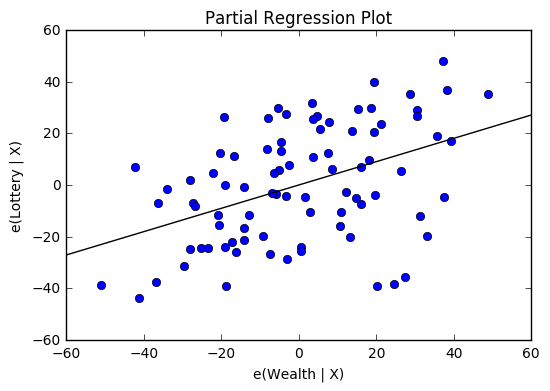

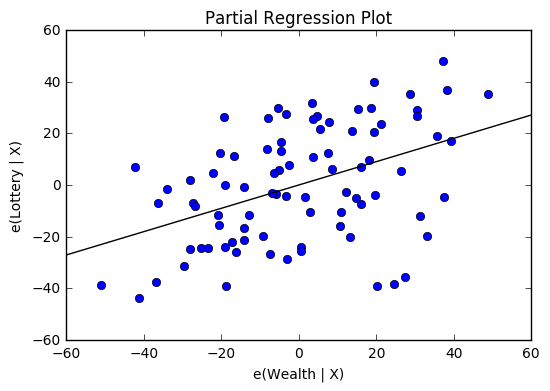

In [8]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                              data=df, obs_labels=False)

### [scikit-learn](http://scikit-learn.org/stable/)



> Machine Learning in Python
>
> - Simple and efficient tools for data mining and data analysis
> - Accessible to everybody, and reusable in various contexts
> - Built on NumPy, SciPy, and matplotlib
> - Open source, commercially usable - BSD license

Reminder: *machine learning* means trying to predict an unknown function based on some sample values. We'll illustrate this with an [example from this tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

In [9]:
from sklearn import datasets
digits = datasets.load_digits()

The ["digits" dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) consists of low-resolution scans of 1797 hand-written digits from the ZIP (postal) code numbers on letters.

In [10]:
type(digits.data)

<type 'numpy.ndarray'>

In [11]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [12]:
digits.data.shape

(1797, 64)

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
len(digits.target)

1797

In [15]:
digits.images[200], digits.target[200]

(array([[  0.,   0.,   0.,   0.,  11.,  12.,   0.,   0.],
        [  0.,   0.,   0.,   3.,  15.,  14.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,  11.,   0.,   0.],
        [  0.,   0.,   9.,  16.,  16.,  10.,   0.,   0.],
        [  0.,   4.,  16.,  12.,  16.,  12.,   0.,   0.],
        [  0.,   3.,  10.,   3.,  16.,  11.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  16.,  14.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  11.,  11.,   0.,   0.]]), 1)

It looks like each entry of `digits.images` is an 8x8 array representing "pixels" in the image, and the corresponding entry of `digits.target` indicates which numeral is represented by the image. To get a better idea of what is being represented here, let's plot one of these images.

In [16]:
import matplotlib.pyplot as plt
def plot_data(n):
    print "scan of %s"%digits.target[n]
    show(plt.matshow(digits.images[n], interpolation="nearest", cmap=plt.cm.Greys_r))

scan of 1


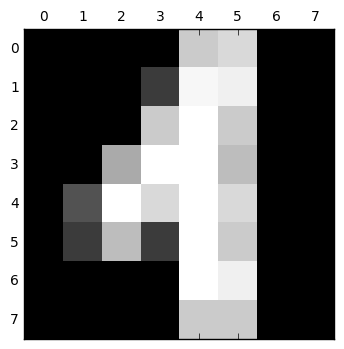

In [17]:
plot_data(200)

scan of 3


3

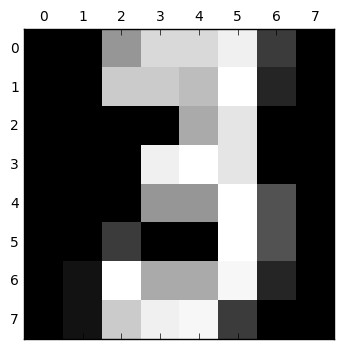

In [18]:
plot_data(389)
digits.target[389]

**Example/goal here:**

> "In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given 1797 samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong."

In this demonstration, we will use a [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) for this purpose. We'll set parameters manually, but scikit-learn also includes some functionality for tuning these parameters automatically.

In [19]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [0]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

This clf is a "classifier".  Right now it doesn't know anything at all about our actual data.

We **train** it by passing in our data to the fit method...

> "We use all the images of our dataset apart from the last one. We select this training set with the [:-1] Python syntax, which produces a new array that contains all but the last entry of digits.data."

In [20]:
# Train our classifier by giving it 1796 scanned digits!
clf.fit(digits.data[:-2], digits.target[:-2])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

scan of 8


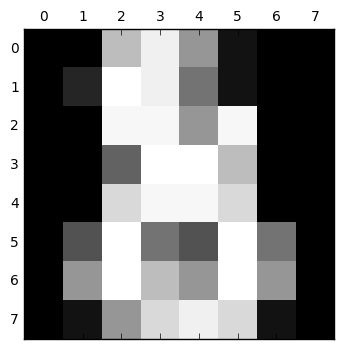

In [21]:
plot_data(1796)  # the last one -- not given

In [22]:
clf.predict(digits.data[-1:]) # Hoping to get 8 here...

array([8])

** Exercise for you right now: **
Run the prediction on all 1797 scanned values to see how many are correct. Note that this is not actually meaningful, as we use some of these scanned values as training data (that is, we are performing an *overfit*).

In [0]:
# To get you started, here is how to test the 5th scanned value.
digits.target[5]
clf.predict(digits.data[5:6])

To avoid overfitting, let's use only 1000 of the digits as training data, and set aside the rest as testing data. How accurate do you expect the predictions to be?

In [23]:
clf.fit(digits.data[:1000], digits.target[:1000])
pre = clf.predict(digits.data[1000:])
ans = digits.target[1000:]

In [24]:
len([i for i in range(797) if pre[i] == ans[i]])

773

As a bonus, here are plots of some low-dimensional embeddings of the digits dataset:

http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html